In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_depth_images(file_name):
    """
    Generate depth images from a voxel dataset and visualize the result.

    Parameters:
    file_name (str): Path to the .npy file containing the voxel data.

    Returns:
    np.ndarray: The combined 64x64x64 depth image array.
    """
    # Load the voxel dataset
    voxel_data = np.load(file_name)  # Load the data from the provided file
    assert voxel_data.shape == (64, 64, 64), "Input array must be 64x64x64."

    # Initialize the resulting array
    depth_images = np.zeros_like(voxel_data, dtype=np.uint8)

    # Compute the depth image along the x-axis (dim=0)
    x_mask = voxel_data.any(axis=0)  # Mask for slices where there's at least one `1`
    x_depth = np.argmax(voxel_data, axis=0)
    depth_images[x_depth, np.arange(64)[:, None], np.arange(64)] = x_mask

    # Compute the depth image along the y-axis (dim=1)
    y_mask = voxel_data.any(axis=1)  # Mask for slices where there's at least one `1`
    y_depth = np.argmax(voxel_data, axis=1)
    depth_images[np.arange(64)[:, None], y_depth, np.arange(64)] += y_mask

    # Compute the depth image along the z-axis (dim=2)
    z_mask = voxel_data.any(axis=2)  # Mask for slices where there's at least one `1`
    z_depth = np.argmax(voxel_data, axis=2)
    depth_images[np.arange(64)[:, None], np.arange(64), z_depth] += z_mask
    
    # Visualization
    # x, y, z = np.indices(depth_images.shape)
    # filled_voxels = (depth_images > 0)

    # fig = plt.figure(figsize=(10, 10))
    # ax = fig.add_subplot(111, projection='3d')

    # ax.voxels(filled_voxels, facecolors="blue", edgecolors="black", alpha=0.7)

    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_zlabel('Z-axis')
    # ax.set_title('Depth Image Visualization')
    # plt.show()

    return depth_images


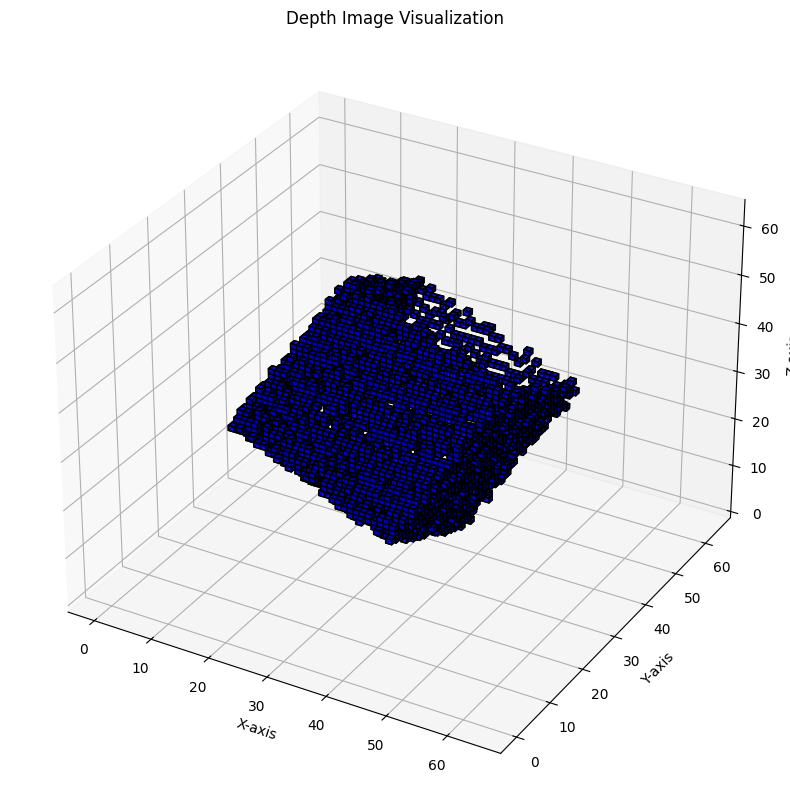

In [2]:
depth_images = generate_depth_images('voxel_datasets/instance_cube_0.npy')


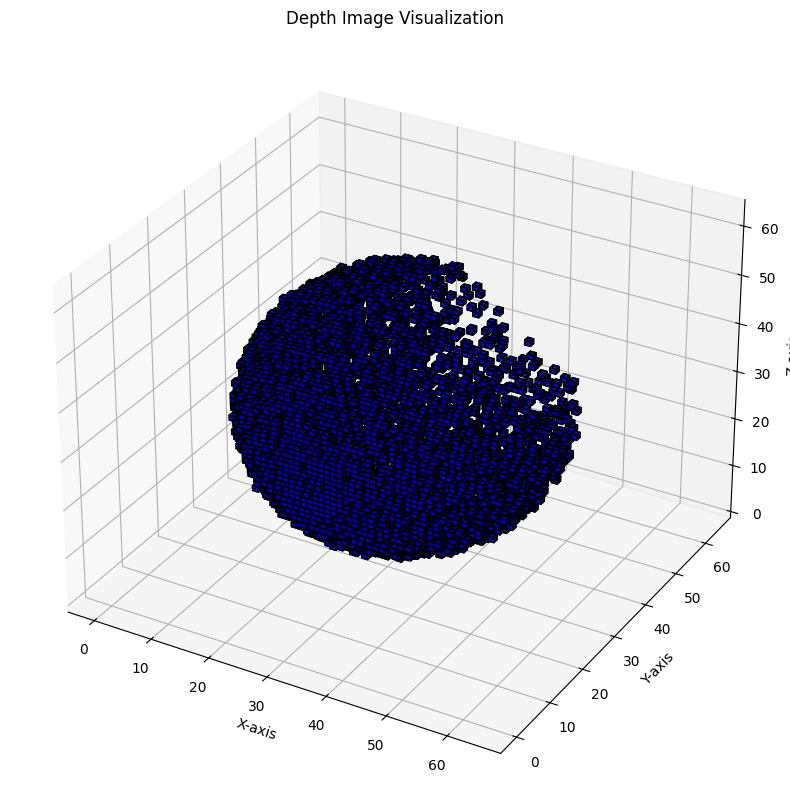

In [13]:
depth_images = generate_depth_images('voxel_datasets/instance_ellipsoid_1000.npy')


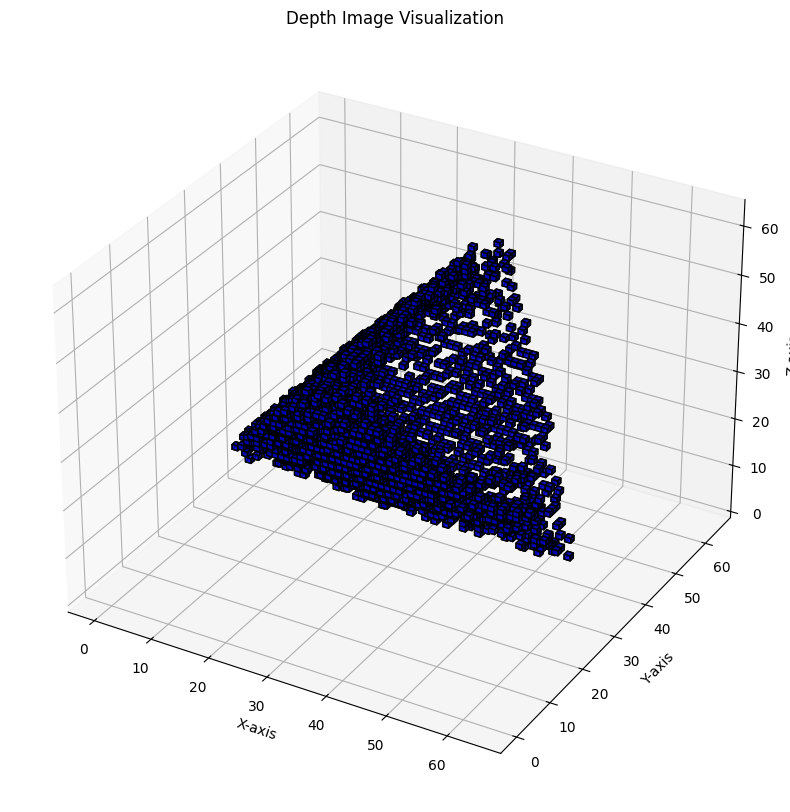

In [14]:
depth_images = generate_depth_images('voxel_datasets/instance_tetrahedron_2000.npy')


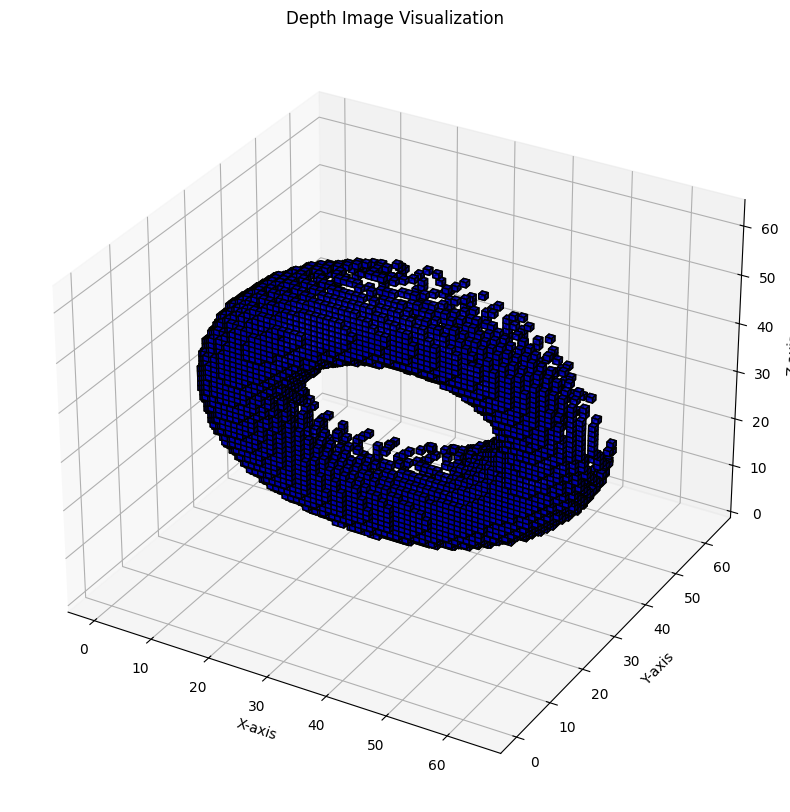

In [16]:
depth_images = generate_depth_images('voxel_datasets/instance_torus_3980.npy')


In [9]:
output_folder = "condition_datasets"
input_folder = "voxel_datasets"
import os
# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Iterate through all 4000 files
for instance_id in range(4000):
    # Generate the input and output file paths
    input_file = os.path.join(input_folder, f"instance_cube_{instance_id}.npy") if instance_id < 1000 \
        else os.path.join(input_folder, f"instance_ellipsoid_{instance_id}.npy") if instance_id < 2000 \
        else os.path.join(input_folder, f"instance_tetrahedron_{instance_id}.npy") if instance_id < 3000 \
        else os.path.join(input_folder, f"instance_torus_{instance_id}.npy")

    output_file = os.path.join(output_folder, f"depth_image_{instance_id}.npy")

    # Check if the input file exists to avoid errors
    if os.path.exists(input_file):
        # Generate the depth images
        depth_image = generate_depth_images(input_file)

        # Save the resulting depth image
        np.save(output_file, depth_image)

        print(f"Processed and saved: {output_file}")
    else:
        print(f"File not found: {input_file}")

Processed and saved: condition_datasets/depth_image_0.npy
Processed and saved: condition_datasets/depth_image_1.npy
Processed and saved: condition_datasets/depth_image_2.npy
Processed and saved: condition_datasets/depth_image_3.npy
Processed and saved: condition_datasets/depth_image_4.npy
Processed and saved: condition_datasets/depth_image_5.npy
Processed and saved: condition_datasets/depth_image_6.npy
Processed and saved: condition_datasets/depth_image_7.npy
Processed and saved: condition_datasets/depth_image_8.npy
Processed and saved: condition_datasets/depth_image_9.npy
Processed and saved: condition_datasets/depth_image_10.npy
Processed and saved: condition_datasets/depth_image_11.npy
Processed and saved: condition_datasets/depth_image_12.npy
Processed and saved: condition_datasets/depth_image_13.npy
Processed and saved: condition_datasets/depth_image_14.npy
Processed and saved: condition_datasets/depth_image_15.npy
Processed and saved: condition_datasets/depth_image_16.npy
Process

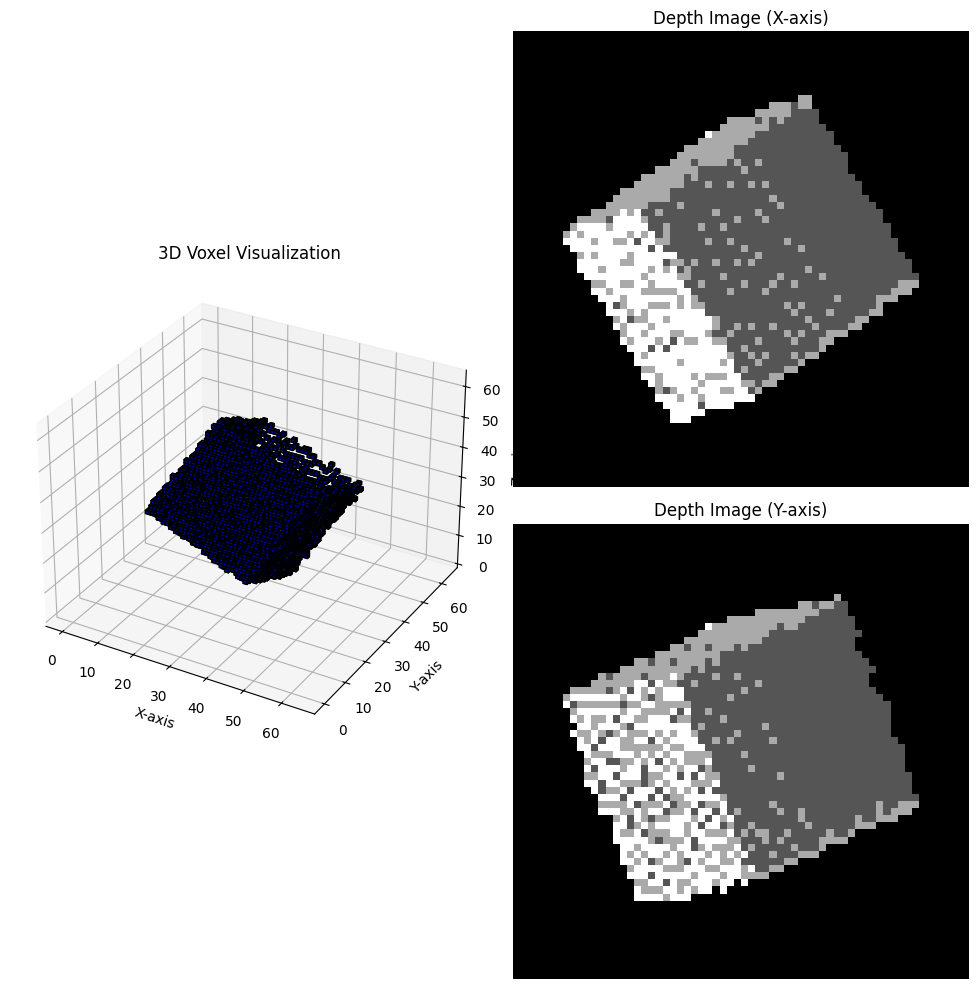

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_voxel_and_depth(file_path):
    """
    Read a .npy file from the specified path, visualize the 3D voxel data,
    and plot the depth images.

    Parameters:
    file_path (str): Path to the .npy file containing the voxel or depth data.
    """
    # Load the file
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return
    
    voxel_data = np.load(file_path)
    assert voxel_data.shape == (64, 64, 64), "Data must be a 64x64x64 array."

    # Visualize the 3D voxel structure
    filled_voxels = (voxel_data > 0)
    x, y, z = np.indices(voxel_data.shape)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(121, projection='3d')

    ax.voxels(filled_voxels, facecolors="blue", edgecolors="black", alpha=0.7)
    ax.set_title("3D Voxel Visualization")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")

    # Visualize the depth images along each axis
    depth_x = voxel_data.max(axis=0)  # Depth image along the x-axis
    depth_y = voxel_data.max(axis=1)  # Depth image along the y-axis
    depth_z = voxel_data.max(axis=2)  # Depth image along the z-axis

    ax2 = fig.add_subplot(222)
    ax2.imshow(depth_x, cmap="gray", origin="lower")
    ax2.set_title("Depth Image (X-axis)")
    ax2.axis("off")

    ax3 = fig.add_subplot(224)
    ax3.imshow(depth_y, cmap="gray", origin="lower")
    ax3.set_title("Depth Image (Y-axis)")
    ax3.axis("off")

    # Show the visualizations
    plt.tight_layout()
    plt.show()

# File path to visualize
file_to_visualize = "condition_datasets/depth_image_0.npy"  # Adjust the file name/path as needed

# Call the visualization function
visualize_voxel_and_depth(file_to_visualize)
